In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/sp/j17p_gc12vn0w3y3ytrs969m0000gn/T/ipykernel_24453/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Lab | Natural Language Processing
### SMS: SPAM or HAM

### Let's prepare the environment

In [14]:
# Imports the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

- Read Data for the Fraudulent Email Kaggle Challenge
- Reduce the training set to speead up development. 

In [33]:
## Reads data for the fraudulent email Kaggle Challenge
train_data = pd.read_csv("/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train.csv",encoding='latin-1')

# Reduces the training set to speed up development. 
train_data = train_data.head(1000)
print(train_data.shape)
train_data.fillna("",inplace=True)

#train_data.head()

(1000, 2)


,text,label
0,"DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...",1
1,Will do.,0
2,Nora--Cheryl has emailed dozens of memos about...,0
3,Dear Sir=2FMadam=2C I know that this proposal ...,1
4,fyi,0


### Let's divide the training and test set into two partitions

In [26]:
# Imports the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Loads the CSV file into a Pandas DataFrame
# train_data = pd.read_csv("/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train.csv",encoding='latin-1')
test_data = pd.read_csv('/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_test.csv')

# Specifies the size of the training validation set
train_validation_size = 0.2  # 20% of the training data for validation
test_validation_size = 0.2 # 20% of the test data for validation

# Splits the datasets into training and validation sets
train_set, validation_set = train_test_split(train_data, test_size=train_validation_size, random_state=42)
test_set, test_validation_set = train_test_split(test_data, test_size=test_validation_size, random_state=42)

# Prints the sizes of each dataset (training and training validation)
print(f"Training Data Splits")
print(f"Total samples: {len(train_data)}")
print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(validation_set)}")

# Prints the sizes of each dataset (test & test validation)
print(f"Test Data Splits")
print(f"Total samples: {len(test_data)}")
print(f"Training set size: {len(test_set)}")
print(f"Validation set size: {len(test_validation_set)}")

# Saves the splits to new CSV files if needed
train_set.to_csv('/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split.csv', index=False)
validation_set.to_csv('/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_validation_split.csv', index=False)
test_set.to_csv('/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_test_split.csv', index=False)
test_validation_set.to_csv('/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_test_validation_split.csv', index=False)


Training Data Splits
Total samples: 1000
Training set size: 800
Validation set size: 200
Test Data Splits
Total samples: 5964
Training set size: 4771
Validation set size: 1193


## Data Preprocessing

In [30]:
# Imports the necessary libraries
import string
import nltk
nltk.download('stopwords')  # Downloads the stopwords resource
# from nltk.corpus import stopwords
print(string.punctuation)
print(stopwords.words("english")[100:110])
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer('english')

[nltk_data] Downloading package stopwords to /Users/sylviaperez-
[nltk_data]     montero/nltk_data...


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']


[nltk_data]   Unzipping corpora/stopwords.zip.


## Now, we have to clean the html code removing words

- First we remove inline JavaScript/CSS
- Then we remove html comments. This has to be done before removing regular tags since comments can contain '>' characters
- Next we can remove the remaining tags

In [45]:
# Imports the necessary libraries
import pandas as pd
import re
from bs4 import BeautifulSoup

# Loads the training data
data = pd.read_csv('/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split.csv')

# Specifies the column containing the text data
text_column = 'text'

# Defines a function to clean the text content
def clean_text(text):
    # Handle missing values
    if pd.isnull(text):
        return ""
    
    # Removes inline JavaScript/CSS (script and style tags)
    soup = BeautifulSoup(text, "html.parser")
    for script_or_style in soup(["script", "style"]):
        script_or_style.decompose()  # Remove these tags completely

    # Removes HTML comments
    no_comments = re.sub(r'<!--.*?-->', '', str(soup), flags=re.DOTALL)

    # Removes remaining HTML tags
    no_tags = re.sub(r'<[^>]+>', '', no_comments)

    # Removes extra whitespace
    clean_text = re.sub(r'\s+', ' ', no_tags).strip()

    return clean_text

# Applies the cleaning function to the 'text' column
data['cleaned_text'] = data[text_column].apply(clean_text)

# Saves the cleaned data to a new CSV file
output_file = '/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split_cleaned.csv'
data.to_csv(output_file, index=False)

print(f"Cleaned data saved to {output_file}")


Cleaned data saved to /Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split_cleaned.csv


/var/folders/sp/j17p_gc12vn0w3y3ytrs969m0000gn/T/ipykernel_24453/269099544.py:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/var/folders/sp/j17p_gc12vn0w3y3ytrs969m0000gn/T/ipykernel_24453/269099544.py:18: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,text,label,cleaned_text
0,"----------- REGARDS, MR NELSON SMITH.KINDLY RE...",1,"----------- REGARDS, MR NELSON SMITH.KINDLY RE..."
1,I have not been able to reach oscar this am. W...,0,I have not been able to reach oscar this am. W...
2,; Huma Abedin B6I'm checking with Pat on the 5...,0,; Huma Abedin B6I'm checking with Pat on the 5...
3,I can have it announced here on Monday - can't...,0,I can have it announced here on Monday - can't...
4,BANK OF AFRICAAGENCE SAN PEDRO14 BP 1210 S...,1,BANK OF AFRICAAGENCE SAN PEDRO14 BP 1210 San P...


- Remove all the special characters
    
- Remove numbers
    
- Remove all single characters
 
- Remove single characters from the start

- Substitute multiple spaces with single space

- Remove prefixed 'b'

- Convert to Lowercase

In [51]:
# Imports the necessary libraries
import pandas as pd
import re
from bs4 import BeautifulSoup

# Loads the training data
data = pd.read_csv('/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split.csv')

# Specifies the column containing the text data
text_column = 'text'

# Defines a function to clean text content
def clean_text(text):
    # Handle missing values
    if pd.isnull(text):
        return ""
    
    # Removes inline JavaScript/CSS (script and style tags)
    soup = BeautifulSoup(text, "html.parser")
    for script_or_style in soup(["script", "style"]):
        script_or_style.decompose()

    # Removes HTML comments
    no_comments = re.sub(r'<!--.*?-->', '', str(soup), flags=re.DOTALL)

    # Removes remaining HTML tags
    no_tags = re.sub(r'<[^>]+>', '', no_comments)

    # Removes special characters and numbers
    no_special_chars = re.sub(r'[^A-Za-z\s]', '', no_tags)

    # Removes single characters
    no_single_chars = re.sub(r'\b\w\b', '', no_special_chars)

    # Substitutes multiple spaces with a single space
    single_spaced = re.sub(r'\s+', ' ', no_single_chars).strip()

    # Removes prefixed 'b' (if any)
    no_prefixed_b = re.sub(r'^b\s+', '', single_spaced)

    # Converts text to lowercase
    cleaned_text = no_prefixed_b.lower()

    return cleaned_text

# Applies the cleaning function to the 'text' column
data['cleaned_text'] = data[text_column].apply(clean_text)

# Saves the cleaned data to a new CSV file
output_file = '/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split_cleaned.csv'
data.to_csv(output_file, index=False)

# Confirmation message
print(f"Cleaned data saved to {output_file}")

Cleaned data saved to /Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split_cleaned.csv


/var/folders/sp/j17p_gc12vn0w3y3ytrs969m0000gn/T/ipykernel_24453/2321172715.py:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/var/folders/sp/j17p_gc12vn0w3y3ytrs969m0000gn/T/ipykernel_24453/2321172715.py:18: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


## Now let's work on removing stopwords
Remove the stopwords.

In [55]:
# Removes stopwords
# Added to previous cleaning steps

# Imports the necessary libraries
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Loads the training data
data = pd.read_csv('/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split.csv')

# Specifies the column containing the text data
text_column = 'text'

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Function to clean text content and remove stopwords
def clean_text(text):
    # Handle missing values
    if pd.isnull(text):
        return ""
    
    # Removes inline JavaScript/CSS (script and style tags)
    soup = BeautifulSoup(text, "html.parser")
    for script_or_style in soup(["script", "style"]):
        script_or_style.decompose()

    # Removes HTML comments
    no_comments = re.sub(r'<!--.*?-->', '', str(soup), flags=re.DOTALL)

    # Removes remaining HTML tags
    no_tags = re.sub(r'<[^>]+>', '', no_comments)

    # Removes special characters and numbers
    no_special_chars = re.sub(r'[^A-Za-z\s]', '', no_tags)

    # Removes single characters
    no_single_chars = re.sub(r'\b\w\b', '', no_special_chars)

    # Substitutes multiple spaces with a single space
    single_spaced = re.sub(r'\s+', ' ', no_single_chars).strip()

    # Removes prefixed 'b' (if any)
    no_prefixed_b = re.sub(r'^b\s+', '', single_spaced)

    # Converts text to lowercase
    cleaned_text = no_prefixed_b.lower()

    # Removes stopwords
    words = cleaned_text.split()
    filtered_text = ' '.join([word for word in words if word not in stop_words])

    return filtered_text

# Applies the cleaning function to the 'text' column
data['cleaned_text'] = data[text_column].apply(clean_text)

# Saves the cleaned data to a new CSV file
output_file = '/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split_cleaned_no_stopwords.csv'
data.to_csv(output_file, index=False)

# Confirmation message
print(f"Cleaned data saved to {output_file}")

[nltk_data] Downloading package stopwords to /Users/sylviaperez-
[nltk_data]     montero/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/sp/j17p_gc12vn0w3y3ytrs969m0000gn/T/ipykernel_24453/1584182575.py:26: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/var/folders/sp/j17p_gc12vn0w3y3ytrs969m0000gn/T/ipykernel_24453/1584182575.py:26: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Cleaned data saved to /Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split_cleaned_no_stopwords.csv


## Tame Your Text with Lemmatization
Break sentences into words, then use lemmatization to reduce them to their base form (e.g., "running" becomes "run"). See how this creates cleaner data for analysis!

In [57]:
# Breaks sentences into words, then uses lemmatization to reduce them to their base form.

# Imports the necessary libraries
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Downloads the necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # WordNet's optional multilingual data

# Loads the dataset
data = pd.read_csv('/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split.csv')

# Specifies the column containing the text data
text_column = 'text'

# Initializes the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Loads stopwords
stop_words = set(stopwords.words('english'))

# Defines a function to clean and lemmatize text
def clean_and_lemmatize(text):
    # Handle missing values
    if pd.isnull(text):
        return ""
    
    # Removes inline JavaScript/CSS and HTML tags
    soup = BeautifulSoup(text, "html.parser")
    for script_or_style in soup(["script", "style"]):
        script_or_style.decompose()
    text = re.sub(r'<[^>]+>', '', str(soup))
    
    # Removes special characters, numbers, and extra spaces
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Keep only alphabets and spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Remove multiple spaces

    # Converts to lowercase
    text = text.lower()

    # Removes stopwords and lemmatize each word
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Joins the lemmatized words back into a sentence
    return ' '.join(lemmatized_words)

# Applies the cleaning and lemmatization function
data['cleaned_lemmatized_text'] = data[text_column].apply(clean_and_lemmatize)

# Saves the cleaned data to a new CSV file
output_file = '/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split_cleaned_lemmatized.csv'
data.to_csv(output_file, index=False)

print(f"Lemmatized data saved to {output_file}")

[nltk_data] Downloading package stopwords to /Users/sylviaperez-
[nltk_data]     montero/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sylviaperez-
[nltk_data]     montero/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/sylviaperez-
[nltk_data]     montero/nltk_data...
/var/folders/sp/j17p_gc12vn0w3y3ytrs969m0000gn/T/ipykernel_24453/2733790020.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Lemmatized data saved to /Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split_cleaned_lemmatized.csv


/var/folders/sp/j17p_gc12vn0w3y3ytrs969m0000gn/T/ipykernel_24453/2733790020.py:32: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


## Bag Of Words
Let's get the 10 top words in ham and spam messages (**EXPLORATORY DATA ANALYSIS**)

Top 10 Words in Ham Messages:
[('u', 114), ('would', 93), ('state', 92), ('pm', 89), ('president', 84), ('percent', 76), ('call', 73), ('secretary', 71), ('time', 70), ('mr', 70)]

Top 10 Words in Spam Messages:
[('money', 795), ('account', 662), ('bank', 606), ('fund', 567), ('u', 454), ('business', 394), ('transaction', 347), ('country', 338), ('transfer', 327), ('company', 319)]


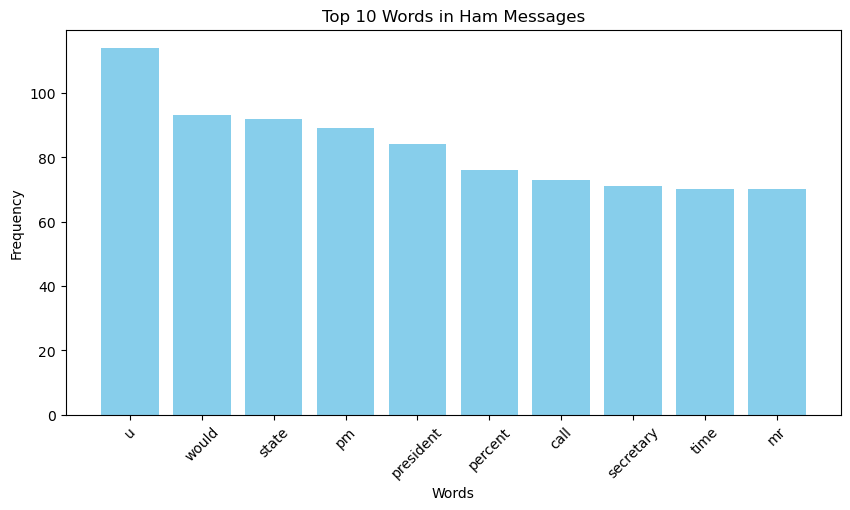

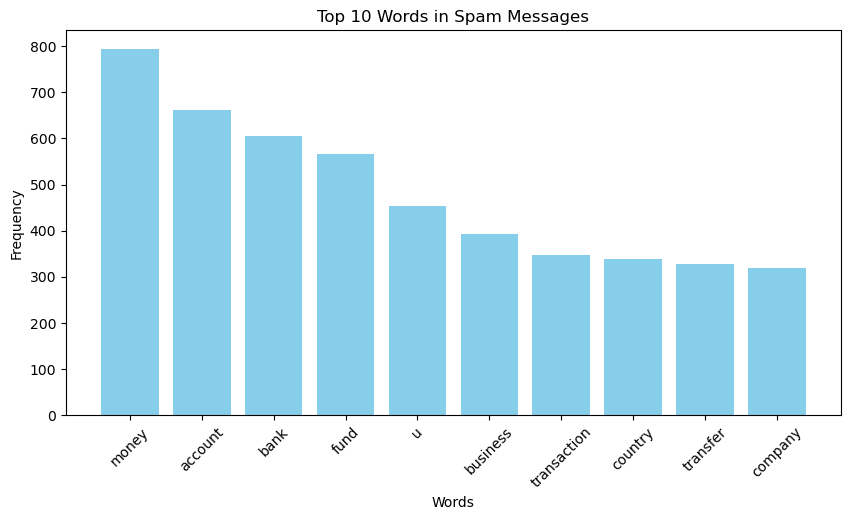

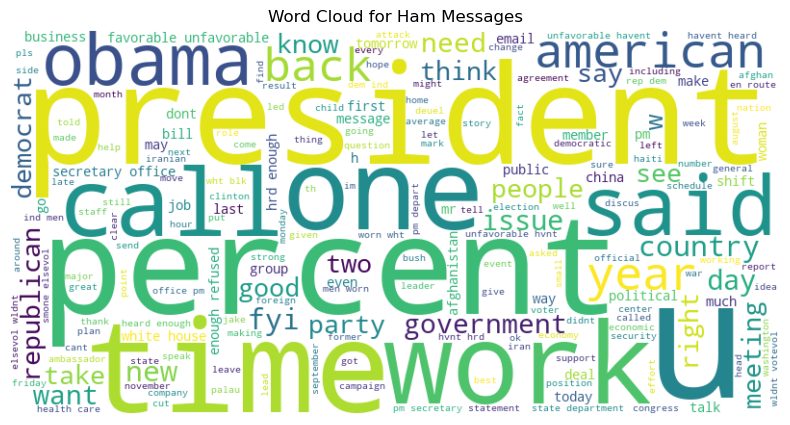

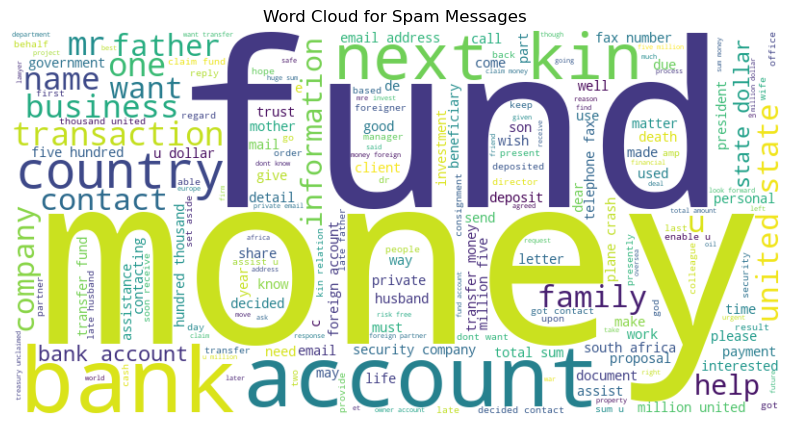

In [72]:
# Identifies the top 10 words in ham and spam messages.

# Imports the necessary libraries
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Loads the dataset
data = pd.read_csv('/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split_cleaned_lemmatized.csv')

# Replaces NaN or non-string values with empty strings in the 'cleaned_lemmatized_text' column
data['cleaned_lemmatized_text'] = data['cleaned_lemmatized_text'].fillna("").astype(str)

# Separates ham (label=0) and spam (label=1) messages
ham_messages = data[data['label'] == 0]['cleaned_lemmatized_text']
spam_messages = data[data['label'] == 1]['cleaned_lemmatized_text']

# Defines a function to tokenize and count word frequencies
def get_top_words(messages, top_n=10):
    all_words = ' '.join(messages).split()  # Tokenize
    word_counts = Counter(all_words)  # Count word frequencies
    return word_counts.most_common(top_n)

# Gets the top 10 words for ham and spam
top_ham_words = get_top_words(ham_messages, top_n=10)
top_spam_words = get_top_words(spam_messages, top_n=10)

# Prints the results
print("Top 10 Words in Ham Messages:")
print(top_ham_words)

print("\nTop 10 Words in Spam Messages:")
print(top_spam_words)

# Visualization: Bar plots for ham and spam
def plot_top_words(top_words, title):
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plots the top words
plot_top_words(top_ham_words, "Top 10 Words in Ham Messages")
plot_top_words(top_spam_words, "Top 10 Words in Spam Messages")

# Generates word clouds for ham and spam messages
def plot_wordcloud(messages, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(messages))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(ham_messages, "Word Cloud for Ham Messages")
plot_wordcloud(spam_messages, "Word Cloud for Spam Messages")

## Extra features

In [87]:
# Displays data file headers for verification
data_train.head()


,text,label,cleaned_lemmatized_text
0,"----------- REGARDS, MR NELSON SMITH.KINDLY RE...",1,regard mr nelson smithkindly reply private ema...
1,I have not been able to reach oscar this am. W...,0,able reach oscar supposed send pdb u receive
2,; Huma Abedin B6I'm checking with Pat on the 5...,0,huma abedin bim checking pat k work jack amp j...
3,I can have it announced here on Monday - can't...,0,announced monday cant today
4,BANK OF AFRICAAGENCE SAN PEDRO14 BP 1210 S...,1,bank africaagence san pedro bp san pedro cote ...


In [89]:
# Loads the dataset
data_train = pd.read_csv('/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split_cleaned_lemmatized.csv')

# Defines lists of money symbols and suspicious words
money_symbol_list = "|".join(["euro", "dollar", "pound", "€", "$"])
suspicious_words_list = "|".join(["free", "cheap", "sex", "money", "account", "bank", "fund", "transfer", 
                                   "transaction", "win", "deposit", "password"])

# Adds indicators to the training dataset
data_train['money_mark'] = data_train['cleaned_lemmatized_text'].str.contains(money_symbol_list, case=False, na=False).astype(int)
data_train['suspicious_words'] = data_train['cleaned_lemmatized_text'].str.contains(suspicious_words_list, case=False, na=False).astype(int)
data_train['text_len'] = data_train['cleaned_lemmatized_text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Adds indicators to the validation dataset
#data_val['money_mark'] = data_val['preprocessed_text'].str.contains(money_symbol_list, case=False, na=False).astype(int)
#data_val['suspicious_words'] = data_val['preprocessed_text'].str.contains(suspicious_words_list, case=False, na=False).astype(int)
#data_val['text_len'] = data_val['preprocessed_text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Displays the first rows of the training dataset with the new indicators
data_train.head()

,text,label,cleaned_lemmatized_text,money_mark,suspicious_words,text_len
0,"----------- REGARDS, MR NELSON SMITH.KINDLY RE...",1,regard mr nelson smithkindly reply private ema...,1,0,75
1,I have not been able to reach oscar this am. W...,0,able reach oscar supposed send pdb u receive,1,0,44
2,; Huma Abedin B6I'm checking with Pat on the 5...,0,huma abedin bim checking pat k work jack amp j...,1,0,85
3,I can have it announced here on Monday - can't...,0,announced monday cant today,1,0,27
4,BANK OF AFRICAAGENCE SAN PEDRO14 BP 1210 S...,1,bank africaagence san pedro bp san pedro cote ...,1,1,1067


## How would work the Bag of Words with Count Vectorizer concept?

In [93]:
# Imports the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer

# Makes sure there are no missing values in the 'cleaned_lemmatized_text' column
data_train['cleaned_lemmatized_text'] = data_train['cleaned_lemmatized_text'].fillna("").astype(str)

# Initializes the CountVectorizer
vectorizer = CountVectorizer(max_features=1000,  # Limit to top 1000 features (optional)
                             stop_words='english',  # Remove common stopwords
                             ngram_range=(1, 1))  # Use unigrams (single words)

# Fits and transforms the 'cleaned_lemmatized_text' column
X_train_bow = vectorizer.fit_transform(data_train['cleaned_lemmatized_text'])

# Converts the sparse matrix to a DataFrame for easy visualization
bow_df = pd.DataFrame(X_train_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Displays the top rows of the bag-of-words DataFrame
print("Bag of Words Representation (Top 5 Rows):")
print(bow_df.head())

# Displays vocabulary (words mapped to indices)
print("\nVocabulary (Top 20 Words):")
print(list(vectorizer.get_feature_names_out())[:20])

Bag of Words Representation (Top 5 Rows):
   abacha  abandoned  abidjan  able  abroad  ac  accept  acceptance  access  \
0       0          0        0     0       0   0       0           0       0   
1       0          0        0     1       0   0       0           0       0   
2       0          0        0     0       0   0       0           0       0   
3       0          0        0     0       0   0       0           0       0   
4       0          0        0     0       0   0       0           0       0   

   accord  ...  yahoo  year  york  youc  youe  youi  young  yr  zimbabwe  \
0       0  ...      0     0     0     0     0     0      0   0         0   
1       0  ...      0     0     0     0     0     0      0   0         0   
2       0  ...      0     0     0     0     0     0      0   0         0   
3       0  ...      0     0     0     0     0     0      0   0         0   
4       0  ...      1     1     0     0     0     0      0   0         0   

   zimbabwean  
0         

## TD-IDF

- Load the vectorizer

- Vectorize all dataset

- print the shape of the vetorized dataset

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensures no missing values in the 'cleaned_lemmatized_text' column
data_train['cleaned_lemmatized_text'] = data_train['cleaned_lemmatized_text'].fillna("").astype(str)

# Initializes the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Limit to top 1000 features (optional)
    stop_words='english',  # Remove common stopwords
    ngram_range=(1, 1)  # Use unigrams (single words)
)

# Vectorizes the dataset (fit and transform on training set)
X_train_tfidf = tfidf_vectorizer.fit_transform(data_train['cleaned_lemmatized_text'])

# Prints the shape of the vectorized dataset
print("Shape of the TF-IDF Vectorized Dataset:")
print(X_train_tfidf.shape)  # (num_samples, num_features)

# Displays the feature names (vocabulary)
print("\nVocabulary (Top 20 Words):")
print(list(tfidf_vectorizer.get_feature_names_out())[:20])

Shape of the TF-IDF Vectorized Dataset:
(800, 1000)

Vocabulary (Top 20 Words):
['abacha', 'abandoned', 'abidjan', 'able', 'abroad', 'ac', 'accept', 'acceptance', 'access', 'accord', 'according', 'account', 'accountant', 'accounti', 'accounting', 'acknowledge', 'act', 'action', 'actual', 'actually']


## And the Train a Classifier?

Classification Report:
              precision    recall  f1-score   support

         Ham       0.89      1.00      0.94        92
        Spam       1.00      0.84      0.91        68

    accuracy                           0.93       160
   macro avg       0.95      0.92      0.93       160
weighted avg       0.94      0.93      0.93       160



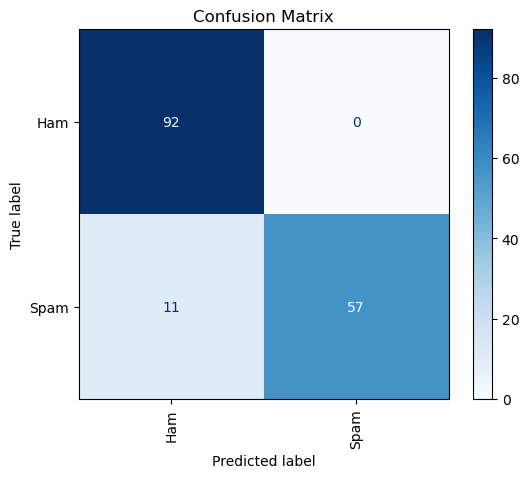

In [97]:
# Train a Classifier

# Imports the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Makes sure there are no missing values in the 'label' column
data_train['label'] = data_train['label'].fillna(0).astype(int)

# Splits the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_tfidf, data_train['label'], test_size=0.2, random_state=42
)

# Initializes the Logistic Regression model
classifier = LogisticRegression(max_iter=1000, random_state=42)

# Trains the classifier on the training set
classifier.fit(X_train, y_train)

# Makes predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluates the model
print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=["Ham", "Spam"]))

# Displays the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Ham", "Spam"])

# Plots the confusion matrix
disp.plot(cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix")
plt.show()

### Extra Task - Implement a SPAM/HAM classifier

https://www.kaggle.com/t/b384e34013d54d238490103bc3c360ce

The classifier can not be changed!!! It must be the MultinimialNB with default parameters!

Your task is to find the **best feature representation**.

You can work with teams of two persons (recommended).


--- Using Bag of Words Representation ---
Classification Report (Bag of Words):
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        92
           1       0.89      0.91      0.90        68

    accuracy                           0.91       160
   macro avg       0.91      0.91      0.91       160
weighted avg       0.91      0.91      0.91       160


--- Using TF-IDF Representation ---
Classification Report (TF-IDF):
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        92
           1       0.93      0.91      0.92        68

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.93       160
weighted avg       0.93      0.93      0.93       160


--- Using TF-IDF with N-Grams Representation ---
Classification Report (N-Grams):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        92
    

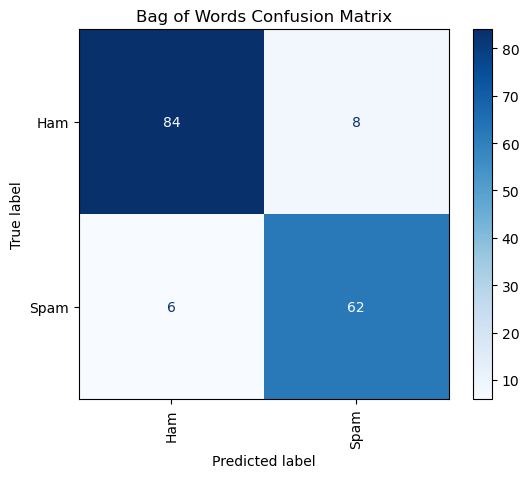

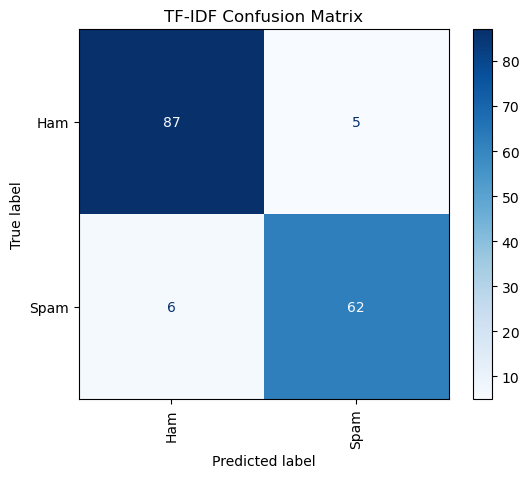

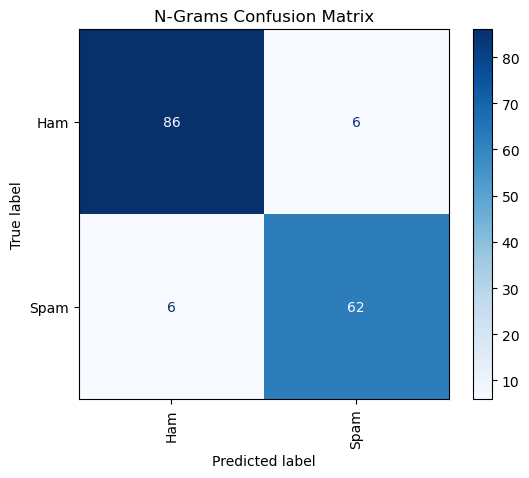

In [101]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Loads the dataset
data = pd.read_csv('/Users/sylviaperez-montero/Desktop/lab-natural-language-processing-main/data/kg_train_split_cleaned_lemmatized.csv')

# Makes sure there are no missing values
data['cleaned_lemmatized_text'] = data['cleaned_lemmatized_text'].fillna("").astype(str)

# Splits the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_lemmatized_text'], data['label'], test_size=0.2, random_state=42
)

# Bag of Words (CountVectorizer)
print("\n--- Using Bag of Words Representation ---")
bow_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Trains the MultinomialNB classifier
bow_classifier = MultinomialNB()
bow_classifier.fit(X_train_bow, y_train)

# Evaluates the Bag of Words model
y_pred_bow = bow_classifier.predict(X_test_bow)
print("Classification Report (Bag of Words):")
print(classification_report(y_test, y_pred_bow))

# Experiment 2: TF-IDF
print("\n--- Using TF-IDF Representation ---")
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Trains the MultinomialNB classifier
tfidf_classifier = MultinomialNB()
tfidf_classifier.fit(X_train_tfidf, y_train)

# Evaluates the TF-IDF model
y_pred_tfidf = tfidf_classifier.predict(X_test_tfidf)
print("Classification Report (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf))

# Experiment 3: N-Grams with TF-IDF
print("\n--- Using TF-IDF with N-Grams Representation ---")
ngram_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))  # Unigrams + Bigrams
X_train_ngram = ngram_vectorizer.fit_transform(X_train)
X_test_ngram = ngram_vectorizer.transform(X_test)

# Trains the MultinomialNB classifier
ngram_classifier = MultinomialNB()
ngram_classifier.fit(X_train_ngram, y_train)

# Evaluates the N-Gram model
y_pred_ngram = ngram_classifier.predict(X_test_ngram)
print("Classification Report (N-Grams):")
print(classification_report(y_test, y_pred_ngram))

# Displays the confusion matrices for all experiments
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Ham", "Spam"])
    disp.plot(cmap="Blues", xticks_rotation="vertical")
    plt.title(title)
    plt.show()

print("\n--- Confusion Matrices ---")
plot_confusion_matrix(y_test, y_pred_bow, "Bag of Words Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_tfidf, "TF-IDF Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_ngram, "N-Grams Confusion Matrix")